In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
trac= pd.read_csv("/content/drive/MyDrive/TRAC/Dataset/dataset.csv")

In [ ]:
test1 = pd.read_csv("/content/drive/MyDrive/TRAC/test/trac_2022_test.tsv",sep='\t')
test2 = pd.read_csv("/content/drive/MyDrive/TRAC/test/trac_all_test.tsv",sep='\t')
test3 = pd.read_csv("/content/drive/MyDrive/TRAC/test/trac_sur_test.tsv",sep='\t')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/TRAC/Dataset/dataset.csv")

In [ ]:
train.head()

,ID,Text,Aggression,Aggression Intensity,Discursive Role,Gender Bias,Communal Bias,Caste/Class Bias,Ethnicity/Racial Bias
0,facebook_corpus_msr_747593,Shaikh Bhai.. Subha Kab Ki Ho gyi Hai.... Man...,CAG,NtAG,NaN,NGEN,NCOM,NCAS,NETH
1,facebook_corpus_msr_2111297,No India is better off in BJPs hands but it is...,OAG,NtAG,NaN,NGEN,NCOM,NCAS,NETH
2,facebook_corpus_msr_1450799,madam ji Sonia ganghi jeetegi tabhi to banegi ...,NAG,NaN,NaN,NGEN,NCOM,NCAS,NETH
3,facebook_corpus_msr_956362,Now i really belive 5vi pass pm ki degree nak...,CAG,NtAG,NaN,NGEN,NCOM,NCAS,NETH
4,facebook_corpus_msr_1972724,Reasons: 1.rahul 2. Rahul 3.rahul 4.rahil . . ...,NAG,NaN,NaN,NGEN,NCOM,NCAS,NETH


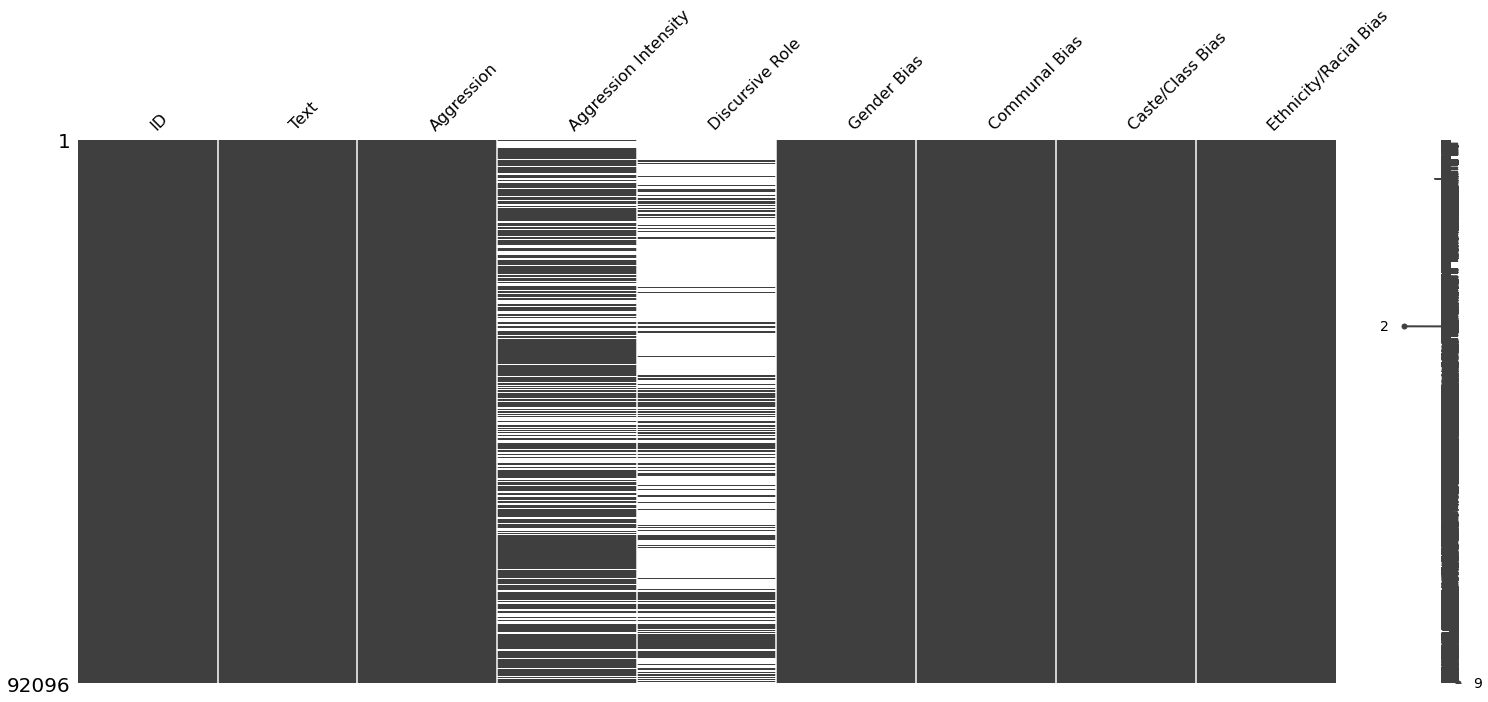

In [ ]:
from missingno import matrix
matrix(train)

In [ ]:
train['Aggression Intensity'] = train['Aggression Intensity'].fillna("NA")
train['Discursive Role'] = train['Discursive Role'].fillna("NA")

In [ ]:
train = train[(train['Discursive Role']!=" `") & (train['Discursive Role']!='PTH')]

In [ ]:
def clean(text):
    s = ""
    for i in text:
        if(i.isalnum() or i==' '):
            s = s + i
        else:
            s = s+ " "
    return s.strip()

In [ ]:
train['text'] = train['Text'].map(clean)

In [ ]:
train.dropna(axis=0,inplace=True)

In [ ]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(train['text'].values)

In [ ]:
x_test1 = vectorizer.transform(test1['Text'].values)
x_test2 =  vectorizer.transform(test2['Text'].values)
x_test3 =  vectorizer.transform(test3['Text'].values)

In [ ]:
train.columns

Index(['ID', 'Text', 'Aggression', 'Aggression Intensity', 'Discursive Role',
       'Gender Bias', 'Communal Bias', 'Caste/Class Bias',
       'Ethnicity/Racial Bias', 'text'],
      dtype='object')

In [ ]:
names = [ 'Aggression', 'Aggression Intensity', 'Discursive Role',
       'Gender Bias', 'Communal Bias', 'Caste/Class Bias',
       'Ethnicity/Racial Bias']
map_dict = {}
for name in names:
    map_dict[name] = dict(zip(train[name].unique(),np.arange(0,len(train[name].unique()))))

In [ ]:
map_dict

{'Aggression': {'CAG': 0, 'NAG': 2, 'OAG': 1},
 'Aggression Intensity': {'CuAG': 2, 'NA': 1, 'NtAG': 0, 'PTH': 4, 'STH': 3},
 'Caste/Class Bias': {'CAS': 1, 'CAST': 2, 'NCAS': 0},
 'Communal Bias': {'COM': 1, 'COMT': 2, 'NCOM': 0},
 'Discursive Role': {'AIN': 3,
  'ATK': 2,
  'CNS': 1,
  'DFN': 4,
  'GSL': 5,
  'NA': 0},
 'Ethnicity/Racial Bias': {'ETH': 1, 'ETHT': 2, 'NETH': 0},
 'Gender Bias': {'GEN': 1, 'GENT': 2, 'NGEN': 0}}

In [ ]:
map_rev_dict = {}
for name in names:
    map_rev_dict[name] = {}
    for key in map_dict[name].items():
        map_rev_dict[name][key[1]] = key[0]

In [ ]:
df = pd.DataFrame()
for name in names:
    df[name] = train[name].map(map_dict[name])
df

,Aggression,Aggression Intensity,Discursive Role,Gender Bias,Communal Bias,Caste/Class Bias,Ethnicity/Racial Bias
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,1,0,0,0,0,0
3,0,0,0,0,0,0,0
4,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...
92091,1,2,0,1,0,0,0
92092,2,1,0,0,0,0,0
92093,1,0,0,0,0,0,0
92094,2,1,0,0,0,0,0


In [ ]:
from sklearn.metrics import f1_score,classification_report

# Multinomial Bayes

## Aggression

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_aggression = MultinomialNB(alpha = 1e-03)
model_aggression.fit(x_train,df['Aggression'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_aggression.predict(x_train)

In [ ]:
print(f"{f1_score(pred,df['Aggression'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Aggression'].values)}")

0.7403051528479122 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.50      0.69      0.58     14896
           1       0.87      0.74      0.80     51994
           2       0.71      0.77      0.74     25195

    accuracy                           0.74     92085
   macro avg       0.69      0.73      0.71     92085
weighted avg       0.77      0.74      0.75     92085



In [ ]:
def return_labels(task:str,label:int):
    return map_rev_dict[task][label]

In [ ]:
aggression1= [return_labels('Aggression',label) for label in model_aggression.predict(x_test1)]
aggression2= [return_labels('Aggression',label) for label in model_aggression.predict(x_test2)]
aggression3= [return_labels('Aggression',label) for label in model_aggression.predict(x_test3)]

In [ ]:
pd.DataFrame({"ID":test2['ID'].values,"Aggression":aggression2}).to_csv('/content/drive/MyDrive/TRAC/Submission/Team1/MNB(a=1e-03)/trac_all_pred.tsv',sep='\t',index=False)

## Aggression Intensity

In [ ]:
model_aggression_intensity = MultinomialNB(alpha = 1e-03)
model_aggression_intensity.fit(x_train,df['Aggression Intensity'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_aggression_intensity.predict(x_train)
print(f"{f1_score(pred,df['Aggression Intensity'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Aggression Intensity'].values)}")

0.7233534234674486 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.77      0.66      0.71     42776
           1       0.69      0.78      0.74     23944
           2       0.69      0.78      0.73     21891
           3       0.67      0.62      0.65      1419
           4       0.68      0.72      0.70      2055

    accuracy                           0.72     92085
   macro avg       0.70      0.71      0.71     92085
weighted avg       0.73      0.72      0.72     92085



In [ ]:
aggressionintensity1= [return_labels('Aggression Intensity',label) for label in model_aggression_intensity.predict(x_test1)]
aggressionintensity3= [return_labels('Aggression Intensity',label) for label in model_aggression_intensity.predict(x_test3)]

## Discursive Role

In [ ]:
model_dr = MultinomialNB(alpha = 1e-03)
model_dr.fit(x_train,df['Discursive Role'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_dr.predict(x_train)
print(f"{f1_score(pred,df['Discursive Role'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Discursive Role'].values)}")

0.8468371613183472 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     66915
           1       0.57      0.49      0.53       547
           2       0.71      0.78      0.74     22031
           3       0.47      0.60      0.53      1779
           4       0.44      0.51      0.47       733
           5       0.66      0.36      0.47        80

    accuracy                           0.85     92085
   macro avg       0.63      0.60      0.61     92085
weighted avg       0.85      0.85      0.85     92085



In [ ]:
discursive1= [return_labels('Discursive Role',label) for label in model_dr.predict(x_test1)]
discursive3= [return_labels('Discursive Role',label) for label in model_dr.predict(x_test3)]

## Gender Bias

In [ ]:
model_gb = MultinomialNB(alpha = 1e-03)
model_gb.fit(x_train,df['Gender Bias'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_gb.predict(x_train)
print(f"{f1_score(pred,df['Gender Bias'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Gender Bias'].values)}")

0.8871694629961449 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     75776
           1       0.68      0.66      0.67     15315
           2       0.57      0.59      0.58       994

    accuracy                           0.89     92085
   macro avg       0.73      0.73      0.73     92085
weighted avg       0.89      0.89      0.89     92085



In [ ]:
gender1= [return_labels('Gender Bias',label) for label in model_gb.predict(x_test1)]
gender3= [return_labels('Gender Bias',label) for label in model_gb.predict(x_test3)]

## Communal Bias

In [ ]:
model_cb = MultinomialNB(alpha = 1e-03)
model_cb.fit(x_train,df['Communal Bias'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_cb.predict(x_train)
print(f"{f1_score(pred,df['Communal Bias'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Communal Bias'].values)}")

0.939219199652495 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     82927
           1       0.68      0.70      0.69      8598
           2       0.72      0.52      0.60       560

    accuracy                           0.94     92085
   macro avg       0.79      0.73      0.75     92085
weighted avg       0.94      0.94      0.94     92085



In [ ]:
cb1= [return_labels('Communal Bias',label) for label in model_cb.predict(x_test1)]
cb3= [return_labels('Communal Bias',label) for label in model_cb.predict(x_test3)]

## Caste/Class Bias

In [ ]:
model_ccb = MultinomialNB(alpha = 1e-03)
model_ccb.fit(x_train,df['Caste/Class Bias'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_ccb.predict(x_train)
print(f"{f1_score(pred,df['Caste/Class Bias'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Caste/Class Bias'].values)}")

0.9852744746701417 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     90144
           1       0.72      0.48      0.58      1879
           2       0.69      0.40      0.51        62

    accuracy                           0.99     92085
   macro avg       0.80      0.63      0.69     92085
weighted avg       0.98      0.99      0.98     92085



In [ ]:
ccb1= [return_labels('Caste/Class Bias',label) for label in model_ccb.predict(x_test1)]
ccb3= [return_labels('Caste/Class Bias',label) for label in model_ccb.predict(x_test3)]

## Ethnicity/Racial Bias

In [ ]:
model_erb = MultinomialNB(alpha = 1e-03)
model_erb.fit(x_train,df['Ethnicity/Racial Bias'].values)

MultinomialNB(alpha=0.001)

In [ ]:
pred = model_erb.predict(x_train)
print(f"{f1_score(pred,df['Ethnicity/Racial Bias'].values,average='micro')} \n -------------------------xxxxxxxxxxx----------------- \n {classification_report(pred,df['Ethnicity/Racial Bias'].values)}")

0.9816691100613564 
 -------------------------xxxxxxxxxxx----------------- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     88944
           1       0.77      0.66      0.71      3059
           2       0.82      0.38      0.52        82

    accuracy                           0.98     92085
   macro avg       0.86      0.68      0.74     92085
weighted avg       0.98      0.98      0.98     92085



In [ ]:
erb1= [return_labels('Ethnicity/Racial Bias',label) for label in model_erb.predict(x_test1)]
erb3= [return_labels('Ethnicity/Racial Bias',label) for label in model_erb.predict(x_test3)]

## Final predictions


In [ ]:
response1 = pd.DataFrame({"ID":test1['ID'],'Aggression': aggression1 , "Aggression Intensity":aggressionintensity1
                          ,'Discursive Role': discursive1, 'Gender Bias':gender1 , 'Communal Bias' :cb1 ,  'Caste/Class Bias':ccb1,
                          'Ethnicity/Racial Bias':erb1})
response1.columns = trac.columns

In [ ]:
response1.to_csv('/content/drive/MyDrive/TRAC/Submission/Team1/MNB(a=1e-03)/trac_2022_pred.tsv',sep='\t',index=False)

In [ ]:
response3 = pd.DataFrame({"ID":test3['ID'],'Aggression': aggression3 , "Aggression Intensity":aggressionintensity3
                          ,'Discursive Role': discursive3, 'Gender Bias':gender3 , 'Communal Bias' :cb3 ,  'Caste/Class Bias':ccb3,
                          'Ethnicity/Racial Bias':erb3})
response3.columns = trac.columns
response3.to_csv('/content/drive/MyDrive/TRAC/Submission/Team1/MNB(a=1e-03)/trac_sur_pred.tsv',sep='\t',index=False)

In [ ]:
Test1 = pd.read_csv('/content/drive/MyDrive/TRAC/Submission/Team2/RF/trac_2022_pred.tsv',sep='\t')
Test2 = pd.read_csv('/content/drive/MyDrive/TRAC/Submission/Team2/RF/trac_sur_pred.tsv',sep='\t')

In [ ]:
Test1['ID'] = test1['ID']
Test2['ID'] = test3['ID']

In [ ]:
Test1.fillna("NA",inplace=True)
Test2.fillna("NA",inplace=True)

In [ ]:
Test1.to_csv('/content/drive/MyDrive/TRAC/Submission/Team2/RF/trac_2022_pred.tsv',sep='\t',index=False)
Test2.to_csv('/content/drive/MyDrive/TRAC/Submission/Team2/RF/trac_sur_pred.tsv',sep='\t',index=False)